# Example of a First-order O.D.E. - (Julia) Notebook

The first time you open this notebook, follow the instructions below...

In [ ]:
# Run only this first 'cell', when starting your notebook session.
# It will take ~3min
!curl -fsSL https://raw.githubusercontent.com/mgiugliano/PrinciplesCompNeurosciencesCourse/main/pvt/deploy_julia.sh | sh

# When the process is completed, perform a 'page refresh'.

-== Installing Julia... please wait (~3min) ==-
Done!

Installing packages... (it takes long)
As we wait, ...let me introduce you my beloved dog.
Her name is Margherita...she is a Sloughi, also known as an Arabian Greyhound Galgo!
             /)-_-(\ 
              (o o)
      .-----__/\o/
     /  __      /
 \__/\ /  \_\ |/
      \     ||
      //     ||
      |\     |\ 


Let's consider this _homogeneous_ **ordinary differential equation (o.d.e.)** (i.e. _the usual boring differential equation_, as we said in class).

$$\frac{df(x)}{dx} = -30\ f(x),$$ with initial condition $f(0)=5$.

-------------

It is _first order_ as only the first derivative of $f(x)$ appears; it is _homogeneous_ because no other function appears, it has _constant coefficients_ as they are not dependent on $x$, and it is _linear_ as only sum/subtractions (and multiplication for a constant) combine together $f(x)$ and its derivative(s). 

Its analytical solution is $f(x) = 5\ e^{-30\ x}$, which is of course a **function** and not a single number. 

## Demo of the Euler's forward method

We solve it by 
   - first discretizing the independent variable $x$ (i.e. into discrete points, uniformly spaced of $\Delta x$) and then 
   - approximating the first derivative, as we learned in class:

$$x \rightarrow k \Delta x\ \ \ \ \ \ \ \ k=1,2,3,...\ \ \ \ \ \ \ \ \frac{df(x)}{dx} \approx \frac{f(k\Delta x) - f\left((k-1) \Delta x\right)}{\Delta x}$$

This turns the o.d.e. into an iterative algebraic equation:

$f(k\Delta x) \approx f((k-1)\Delta x) - 30 \Delta x\ f((k-1)\Delta x) \ \ \ \ \ \ \ \ k=1,2,3,...$


In [ ]:
# julia cells
function square(x)
  return x*x
end

square(5)

25

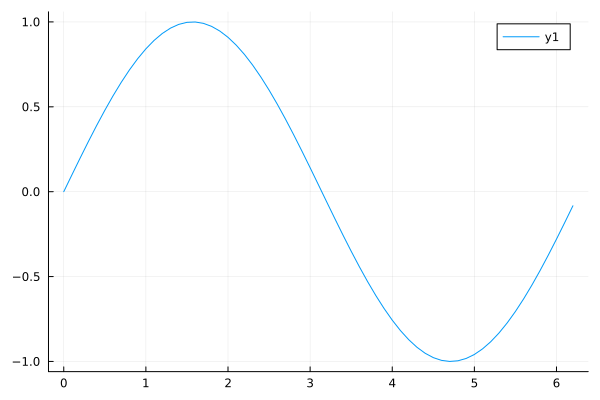

In [ ]:
using Plots
gr()
#plotlyjs()
x = 0:0.1:6.28
y = sin.(x)
plot(x, y)

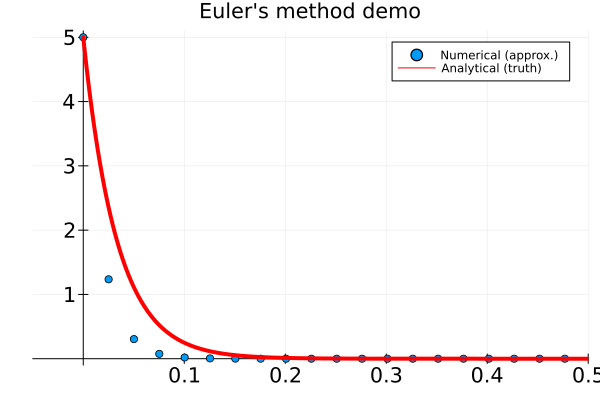

In [ ]:
 dx = 0.0251 #@param {type:"slider", min:0.0007, max:0.03, step:0.0001}
 #dx = 0.01;

 T = 0.5 					# Maximal value of x, to calculate the solution  
 N   = Int64(ceil(T / dx))  # Number of integration steps, given the choice of Δx 

 f = zeros(N,1); 			# Initialization of an array of N elements with 0s
	

 # Euler method ---------------------------------------------------------------
 x   = 0:dx:(N-1)*dx;    # This is the 'x-axis' for the numerical solution

 f[1] = 5;     # Initial condition

 for k=2:N,                               # Loop over each discrete step for x
    f[k] = f[k-1] + -30 * f[k-1] * dx;    # Euler forward method;
 end                                      # End of the loop;
# ----------------------------------------------------------------------------


 # Analytical solution --------------------------------------------------------	
 x1  = 0:0.001:T; 				# This is the 'x-axis' for the analytical solution
 g   = f[1] * exp.(-30 * x1); 	# Analytical solution;
 # ----------------------------------------------------------------------------

 # Plotting instructions ------------------------------------------------------		
 plot(x, f, 
		seriestype = :scatter, 
		label="Numerical (approx.)");   # Numerical sol. 
 
 plot!(x1, g, 
		label="Analytical (truth)", 
		linewidth=4, 
		linecolor=:red, 
		title="Euler's method demo", 
		xtickfont=font(14, "Arial"),
		ytickfont=font(14, "Arial"),
		framestyle = :origin); # Analytical sol.

 xlims!((-0.05,0.5))
 ylims!((-0.1,5.1))
